<h1 align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;应用系统体系架构 - 人工智能模块 </h1>

<h1 align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;A4：循环神经网络</h1>

## 0. 引言

这个教程主要介绍了使用循环神经网络来进行预测和文本生成的例子，有助于大家理解 RNN 和 LSTM 的使用方式。

本教程中的例子来自于ChatGPT。

## 1. 加载必要的包

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## 2. 生成模拟的时间序列数据集

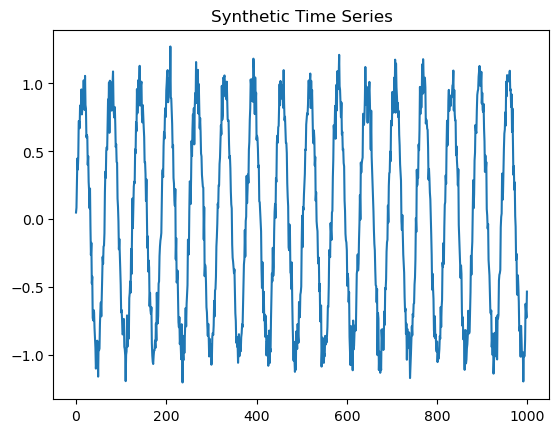

In [2]:
# Generate synthetic time series data
np.random.seed(42)
time_series = np.sin(np.arange(0, 100, 0.1)) + np.random.normal(scale=0.1, size=1000)  # Sinusoidal data with noise
plt.plot(time_series)
plt.title("Synthetic Time Series")
plt.show()

# Function to create a supervised learning dataset
def create_dataset(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back])
        y.append(data[i + look_back])
    return np.array(X), np.array(y)

# Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(time_series.reshape(-1, 1))

look_back = 20  # Number of previous time steps to use as input
X, y = create_dataset(scaled_data, look_back)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input for RNN [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

## 3. 构建 RNN 模型进行预测

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
25/25 [==============================] - 8s 33ms/step - loss: 0.0882 - val_loss: 0.0129
Epoch 2/20
25/25 [==============================] - 0s 19ms/step - loss: 0.0086 - val_loss: 0.0057
Epoch 3/20
25/25 [==============================] - 0s 18ms/step - loss: 0.0059 - val_loss: 0.0051
Epoch 4/20
25/25 [==============================] - 0s 18ms/step - loss: 0.0045 - val_loss: 0.0036
Epoch 5/20
25/25 [==============================] - 1s 21ms/step - loss: 0.0040 - val_loss: 0.0032
Epoch 6/20
25/25 [===

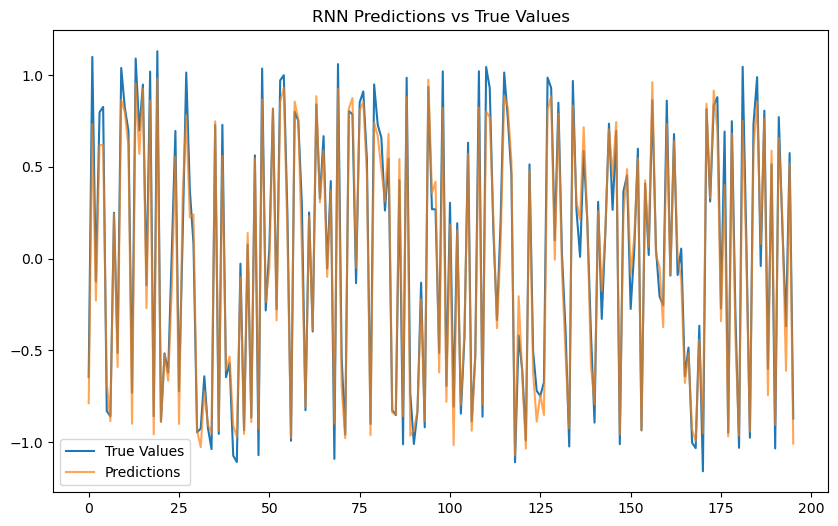

In [3]:
# Build the RNN model
model = Sequential([
    SimpleRNN(50, input_shape=(look_back, 1), return_sequences=False, activation='tanh'),
    Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)
model.save("model.keras")

# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform predictions and actual values
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Values')
plt.plot(y_pred, label='Predictions', alpha=0.7)
plt.legend()
plt.title("RNN Predictions vs True Values")
plt.show()

## 4. 构建 LSTM 模型进行预测

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
25/25 [==============================] - 8s 17ms/step - loss: 0.1003 - val_loss: 0.5864
Epoch 2/20
25/25 [==============================] - 0s 6ms/step - loss: 0.0258 - val_loss: 0.5182
Epoch 3/20
25/25 [==============================] - 0s 6ms/step - loss: 0.0152 - val_loss: 0.4681
Epoch 4/20
25/25 [==============================] - 0s 6ms/step - loss: 0.0047 - val_loss: 0.4064
Epoch 5/20
25/25 [==============================] - 0s 5ms/step - loss: 0.0022 - val_loss: 0.4156
Epoch 6/20
25/25 [===

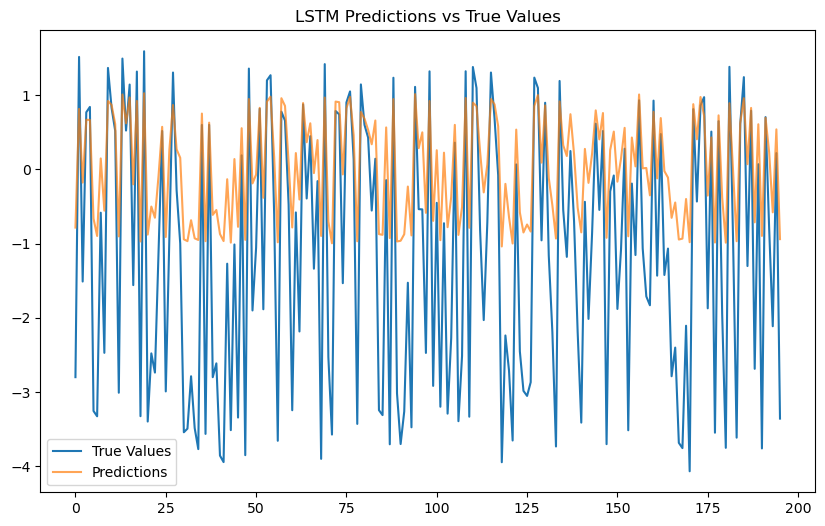

In [4]:
from keras.layers import LSTM

# Build the LSTM model
model = Sequential([
    LSTM(50, input_shape=(look_back, 1), return_sequences=False),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)
model.save("model.keras")

# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform predictions and actual values
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Values')
plt.plot(y_pred, label='Predictions', alpha=0.7)
plt.legend()
plt.title("LSTM Predictions vs True Values")
plt.show()

## 5. 使用RNN进行文本生成

In [5]:
from keras.layers import Embedding
from keras.utils.np_utils import to_categorical

# Sample text corpus
text = "Once upon a time, there was a brave knight who fought a dragon to save a kingdom."

# Create a character-to-index and index-to-character mapping
chars = sorted(set(text))  # Unique characters in the text
char_to_idx = {char: idx for idx, char in enumerate(chars)}
idx_to_char = {idx: char for idx, char in enumerate(chars)}

# Parameters
seq_length = 40  # Length of input sequences
step = 3  # Step size for sampling sequences
vocab_size = len(chars)

# Prepare the dataset
sequences = []
next_chars = []
for i in range(0, len(text) - seq_length, step):
    sequences.append(text[i: i + seq_length])
    next_chars.append(text[i + seq_length])

x = np.zeros((len(sequences), seq_length, vocab_size), dtype=np.bool_)
y = np.zeros((len(sequences), vocab_size), dtype=np.bool_)

for i, seq in enumerate(sequences):
    for t, char in enumerate(seq):
        x[i, t, char_to_idx[char]] = 1
    y[i, char_to_idx[next_chars[i]]] = 1

# Build the RNN model
model = Sequential([
    SimpleRNN(128, input_shape=(seq_length, vocab_size), return_sequences=False),
    Dense(vocab_size, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy')
model.summary()

# Train the model
model.fit(x, y, batch_size=64, epochs=20)

# Text generation function
def generate_text(model, start_string, length=100):
    generated_text = start_string
    input_sequence = np.zeros((1, seq_length, vocab_size), dtype=np.bool_)

    # Prepare initial input sequence
    for i, char in enumerate(start_string):
        if i < seq_length:
            input_sequence[0, i, char_to_idx[char]] = 1

    for _ in range(length):
        # Predict next character
        predictions = model.predict(input_sequence, verbose=0)
        next_index = np.argmax(predictions)
        next_char = idx_to_char[next_index]

        # Add the predicted character to the text
        generated_text += next_char

        # Update the input sequence
        next_input = input_sequence[0, 1:]
        next_input = np.vstack([next_input, np.zeros((1, vocab_size))])
        next_input[-1, next_index] = 1
        input_sequence = next_input[np.newaxis, ...]

    return generated_text

# Generate text
start_text = "Once upon a time, there was "
generated_text = generate_text(model, start_text)
print(f"Generated Text:\n{generated_text}")

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 128)               19584     
_________________________________________________________________
dense_2 (Dense)              (None, 24)                3096      
Total params: 22,680
Trainable params: 22,680
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1/1 [==============================] - 1s 637ms/step - loss: 3.4505
Epoch 2/20
1/1 [==============================] - 0s 33ms/step - loss: 3.1122
Epoch 3/20
1/1 [==============================] - 0s 33ms/step - loss: 2.8051
Epoch 4/20
1/1 [==============================] - 0s 32ms/step - loss: 2.5255
Epoch 5/20
1/1 [==============================] - 0s 38ms/step - loss: 2.2695
Epoch 6/20
1/1 [==============================] - 0s 57ms/step - loss: 2.0341
Epoch 7/20
1/1 [===========================

## 6. 使用LSTM进行文本生成

In [6]:
# Sample text corpus
text = "Once upon a time, there was a brave knight who fought a dragon to save a kingdom."

# Create a character-to-index and index-to-character mapping
chars = sorted(set(text))  # Unique characters in the text
char_to_idx = {char: idx for idx, char in enumerate(chars)}
idx_to_char = {idx: char for idx, char in enumerate(chars)}

# Parameters
seq_length = 40  # Length of input sequences
step = 3  # Step size for sampling sequences
vocab_size = len(chars)

# Prepare the dataset
sequences = []
next_chars = []
for i in range(0, len(text) - seq_length, step):
    sequences.append(text[i: i + seq_length])
    next_chars.append(text[i + seq_length])

x = np.zeros((len(sequences), seq_length, vocab_size), dtype=np.bool_)
y = np.zeros((len(sequences), vocab_size), dtype=np.bool_)

for i, seq in enumerate(sequences):
    for t, char in enumerate(seq):
        x[i, t, char_to_idx[char]] = 1
    y[i, char_to_idx[next_chars[i]]] = 1

# Build the RNN model
model = Sequential([
    LSTM(128, dropout=0.2, recurrent_dropout=0.2, input_shape=(seq_length, vocab_size), return_sequences=True),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=False),
    Dense(vocab_size, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy')
model.summary()

# Train the model
model.fit(x, y, batch_size=64, epochs=20)

# Text generation function
def generate_text(model, start_string, length=100):
    generated_text = start_string
    input_sequence = np.zeros((1, seq_length, vocab_size), dtype=np.bool_)

    # Prepare initial input sequence
    for i, char in enumerate(start_string):
        if i < seq_length:
            input_sequence[0, i, char_to_idx[char]] = 1

    for _ in range(length):
        # Predict next character
        predictions = model.predict(input_sequence, verbose=0)
        next_index = np.argmax(predictions)
        next_char = idx_to_char[next_index]

        # Add the predicted character to the text
        generated_text += next_char

        # Update the input sequence
        next_input = input_sequence[0, 1:]
        next_input = np.vstack([next_input, np.zeros((1, vocab_size))])
        next_input[-1, next_index] = 1
        input_sequence = next_input[np.newaxis, ...]

    return generated_text

# Generate text
start_text = "Once upon a time, there was "
generated_text = generate_text(model, start_text)
print(f"Generated Text:\n{generated_text}")

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 40, 128)           78336     
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 24)                3096      
Total params: 213,016
Trainable params: 213,016
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1/1 [==============================] - 3s 3s/step - loss: 3.1686
Epoch 2/20
1/1 [==============================] - 0s 403ms/step - loss: 3.1405
Epoch 3/20
1/1 [==============================] - 0s 424ms/step - loss: 3.1076
Epoch 4/20
1/1 [==============================] - 0s 395ms/step - loss: 3.0799
Epoch 5/20
1/1 [==============================] - 0s 391ms/step -